Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'prediction + input overlay')

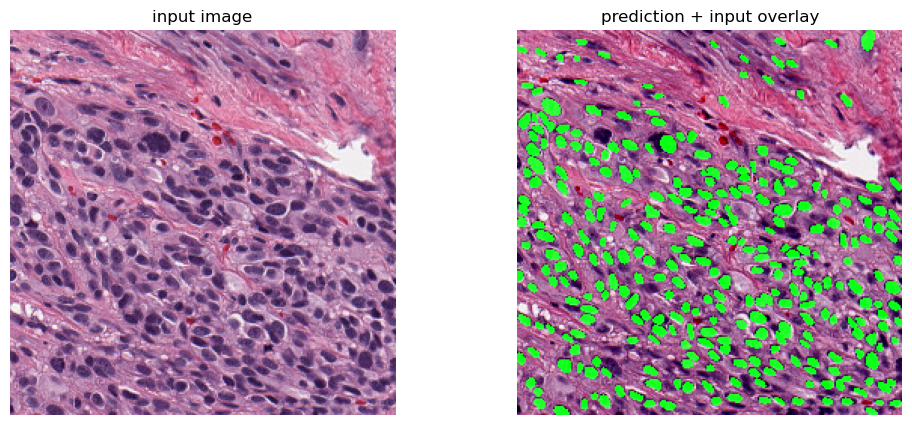

In [19]:
# Get image
from skimage.io import imread
test_image_path = r"D:\images\tnia-python-images\imagesc\2024_05_07_versatile_he\TCGA-38-6178-01Z-00-DX1.tif"
test_image_path = r"D:\images\tnia-python-images\imagesc\2024_05_07_versatile_he\versative.jpeg"
test_img = imread(test_image_path)

# Make model
from stardist.models import StarDist2D
model = StarDist2D.from_pretrained('2D_versatile_he')


# Make predictions (labels)
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

prob_thresh = None
nms_thresh = None

test_img = test_img[:256,:256,:]
labels, _ = model.predict_instances(normalize(test_img), scale = 3, 
                                    prob_thresh=prob_thresh, 
                                    nms_thresh=nms_thresh)

# Plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(test_img)
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=test_img, cmap=(0,255,0), alpha=0.5))
plt.axis("off")
plt.title("prediction + input overlay")

In [13]:
test_img.shape

(1000, 1000, 3)